# Evolución Precios

## Imports

In [9]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
%matplotlib inline


## Recuperación Productos

In [7]:
#Creación lista meses
arMeses = ['Enero', 'Febrero', 'Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
#Creación DataFrame datatos Productos del año elegido
datPrecios = pd.read_excel ('/Users/ivaniglesiasalcon/Datos/PRECIOS_2002_2017.xls', skiprows=4, index_col=  0, names =arMeses ,  sheetname = '2016')

In [8]:
#Creación de excel con los datos de limpios del año alegido
#writer = ExcelWriter('./datos/output.xlsx') #Es la ruta antigua
writer = ExcelWriter('/Users/ivaniglesiasalcon/Datos/output.xlsx') ##Es la ruta antigua
datPrecios.to_excel(writer,'Hoja 1') 

writer.save()
 


In [4]:
#Recuperar Lista Agrupaciones 
lista = list(datPrecios.iloc[:,1])
listNumAgrupacion=[i for i,x in enumerate(lista) if x=='F']
listNombreAgrupacion = list(datPrecios[datPrecios.iloc[:,1].replace(' ','_') == 'F'].index)
listaAgrupacion = list(zip(listNumAgrupacion,listNombreAgrupacion))

serie = pd.Series(listaAgrupacion)

def fEvolucion (vAlimento):
    'Función que crea una lista de Todos los productos'    
    for p,l in serie.iteritems():
        if vAlimento in l:
            vInicio,a = l
            if p+1 < len(serie):
                vFinal,b = serie[p+1]
            else:
                vFinal = len(datPrecios)
           
            return(vInicio,vFinal)
#Se recupera Frutas frescas como ejemplo y por ser productos con temporada        
vInicio,vFinal = fEvolucion('FRUTAS FRESCAS')
#listaAgrupacion contiene todas las agrupaciones de productos
listaAgrupacion 


[(0, 'CEREALES Y DERIVADOS'),
 (10, 'PAN'),
 (18, 'CARNE DE VACUNO'),
 (25, 'CARNE DE OVINO'),
 (34, 'CARNE DE PORCINO'),
 (42, 'CARNE DE AVE'),
 (45, 'OTRAS CARNES'),
 (67, 'PESCADO FRESCO Y CONGELADO'),
 (97, 'CRUSTÁCEOS, MOLUSCOS Y PREP. DE PESCADO'),
 (118, 'HUEVOS'),
 (123, 'LECHE'),
 (129, 'PRODUCTOS LÁCTEOS'),
 (139, 'ACEITES Y GRASAS'),
 (148, 'FRUTAS FRESCAS'),
 (184, 'FRUTAS EN CONSERVA Y FRUTOS SECOS'),
 (193, 'LEGUMBRES Y HORTALIZAS FRESCAS'),
 (220, 'PREPARADOS DE LEGUMBRES Y HORTALIZAS'),
 (237, 'PATATAS Y SUS PREPARADOS'),
 (243, 'AZUCAR'),
 (255, 'OTROS PREPARADOS ALIMENTICIOS'),
 (267, 'CAFÉ, CACAO E INFUSIONES'),
 (275, 'AGUA MINERAL, REFRESCOS Y ZUMOS'),
 (282, 'ESPIRITUOSOS Y LICORES'),
 (291, 'VINOS'),
 (295, 'CERVEZA')]

In [5]:
#Creación de DataFrame indicando la primera y última posición de
#frutas frescas dentro del DataFrame DatPrecios
datProductos = (datPrecios[vInicio+1:vFinal])
 

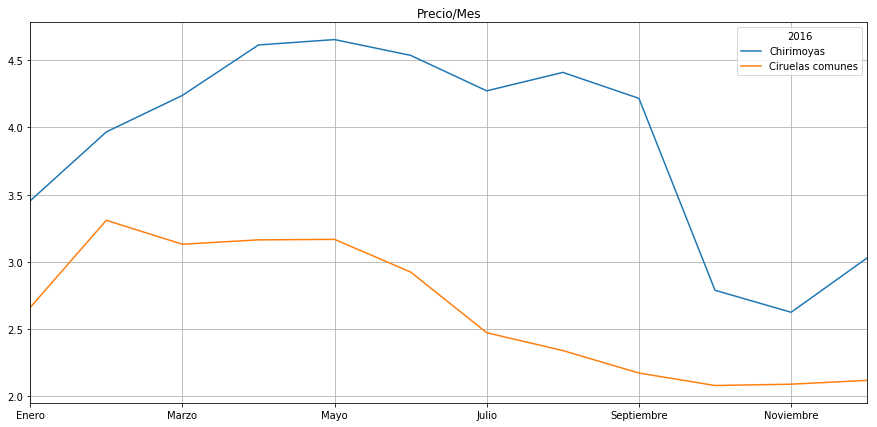

In [6]:
#ejemplo de visualización de dos frutas
datProductos[5:7].T.plot(grid = True,title = 'Precio/Mes', ﬁgsize=(15,7)); 

In [7]:
#DataFrame con todos los productos del mes seleccionado sin los registros
#de la agrupación
datPrecios = datPrecios[datPrecios.iloc[:,1] != 'F']

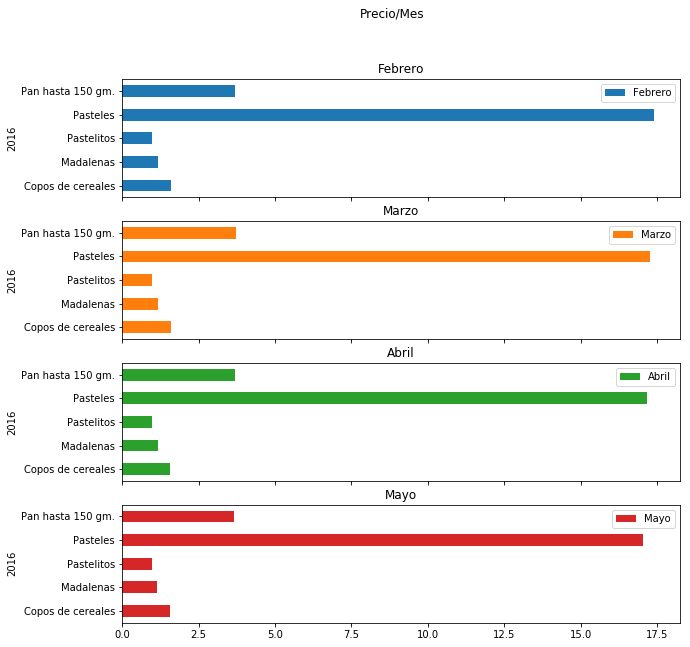

In [33]:
#Ejemplo de visualización de varios productos
ax1,ax2,ax3, ﬁg = datPrecios.iloc[5:10,1:5].plot( kind = 'barh' , subplots = True, title = 'Precio/Mes', ﬁgsize=(10,10))

## Visualización Datos Productos de temporada

In [9]:
#Generación de excel con los datos de Frutas Frescas
datExcel = datProductos
writer = ExcelWriter('/Users/ivaniglesiasalcon/Datos/Frutas.xlsx') 
datExcel.to_excel(writer,'Hoja 1') 

writer.save()

#Generación de excel con los datos de Frutas Frescas T
datExcelT = datProductos.T
writer = ExcelWriter('/Users/ivaniglesiasalcon/Datos/FrutasT.xlsx') 
datExcelT.to_excel(writer,'Hoja 1') 

writer.save()

In [10]:
#DataFrame Frutas Frescas por Mes
datTemporada = pd.read_excel ('/Users/ivaniglesiasalcon/Datos/Temporada_Frutas.xlsx', index_col=  0, names =arMeses )

In [11]:
mes = input ("Escribe Mes  ")
#Se crea el objeto que almacenará los productos de temporada del mes 
#elegido
if mes in  arMeses:
    datFrutaTemporada = datTemporada[mes].dropna() 
else:
    mes = 'Enero'#si no se elige més se recupera por defecto Enero
    datFrutaTemporada = datTemporada['Enero'].dropna() 
mes


Escribe Mes  


'Enero'

In [12]:
#Frutas en temporada del mes introducido
datFrutaTemporada

Fruta
Chirimoyas                2.0
Fresón                    2.0
Higos                     2.0
Kiwis                     1.0
Limones                   1.0
Mandarinas Clementinas    1.0
Mandarinas comunes        1.0
Manzanas comunes          1.0
Manzanas Golden           1.0
Manzanas roja             1.0
Naranjas tipo Navel       1.0
Piñas                     1.0
Platanos de Canarias      1.0
Pomelos                   1.0
Name: Enero, dtype: float64

In [13]:
#Array de Frutas, para imprimir la selección de la fruta
arFrut = []
for x in datFrutaTemporada.index:
    arFrut.append (x)


In [14]:
datProductos.loc[arFrut[0:len(arFrut)],mes]


2016
Chirimoyas                3.45411
Fresón                    5.08629
Higos                         NaN
Kiwis                     3.03494
Limones                   1.99339
Mandarinas Clementinas    1.90637
Mandarinas comunes         1.8714
Manzanas comunes          1.81336
Manzanas Golden           1.72927
Manzanas roja             1.95559
Naranjas tipo Navel       1.35086
Piñas                     1.91242
Platanos de Canarias      2.12142
Pomelos                   1.65923
Name: Enero, dtype: object

In [15]:
datProductos.loc[arFrut[0:len(arFrut)]]


,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
2016,,,,,,,,,,,,
Chirimoyas,3.45411,3.96592,4.23729,4.61222,4.65222,4.53491,4.27124,4.40838,4.21544,2.78939,2.62591,3.03
Fresón,5.08629,3.70458,3.36912,2.81096,3.00758,3.64063,4.53662,4.83699,5.34866,6.21248,7.52546,8.69
Higos,NaN,NaN,2.5175,NaN,NaN,5.13377,5.18534,4.62138,4.5161,4.56277,4.38321,NaN
Kiwis,3.03494,2.96166,2.9041,2.9839,3.01905,3.24618,3.26905,3.25305,3.24772,3.26205,3.22399,3.18
Limones,1.99339,1.93632,1.89723,2.00621,2.34106,2.58878,2.80468,2.88164,2.86214,2.52083,2.29983,2.11
Mandarinas Clementinas,1.90637,2.00888,2.13924,2.11571,2.07612,2.01888,2.145,2.59098,2.92045,2.11961,1.93987,1.75
Mandarinas comunes,1.8714,2.00462,2.02668,1.74662,1.65546,1.65952,1.9043,2.49705,2.57139,2.02309,1.93379,1.77
Manzanas comunes,1.81336,1.81921,1.83264,1.8872,1.89592,1.92705,1.9738,2.01145,1.9731,1.94012,1.87213,1.85
Manzanas Golden,1.72927,1.72161,1.69307,1.73586,1.75944,1.77455,1.80686,1.81226,1.79932,1.80326,1.78172,1.75


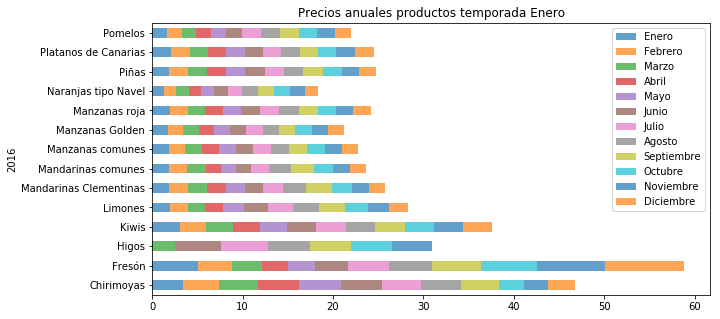

In [16]:

daProductosTemporada = datProductos.loc[[x for x in datFrutaTemporada.index]]
daProductosTemporada = daProductosTemporada.dropna(axis = 0 , thresh = 3)
daProductosTemporada.plot.barh(title = 'Precios anuales productos temporada ' + mes ,stacked=True, alpha=0.7,figsize=(10,5));



In [17]:

datProPreciosTemp = daProductosTemporada#daProductosTemporada.loc[arFrut[0:len(arFrut)]].dropna()

## Información del Producto Elegido

In [18]:
#datProPreciosTemp.index
list(datProPreciosTemp.index)

['Chirimoyas',
 'Fresón',
 'Higos',
 'Kiwis',
 'Limones',
 'Mandarinas Clementinas',
 'Mandarinas comunes',
 'Manzanas comunes',
 'Manzanas Golden',
 'Manzanas roja',
 'Naranjas tipo Navel',
 'Piñas',
 'Platanos de Canarias',
 'Pomelos']

In [19]:
producto = input ("Escribe Producto de la lista anterior: ")

Escribe Producto de la lista anterior: Limones


In [20]:
#Tratamiento producto elegido
if producto in datProPreciosTemp.index: 
    vSeriesProducto = pd.Series(datProPreciosTemp.loc[producto].T)
else:
    producto = 'Piñas'
    vSeriesProducto = pd.Series(datProPreciosTemp.loc[producto].T)
#vSeriesProducto.dropna().plot(title = producto, figsize = (12,3) );
vSeriesProducto = vSeriesProducto.dropna()

In [21]:
#precios Año producto elegido
vSeriesProducto

Enero         1.99339
Febrero       1.93632
Marzo         1.89723
Abril         2.00621
Mayo          2.34106
Junio         2.58878
Julio         2.80468
Agosto        2.88164
Septiembre    2.86214
Octubre       2.52083
Noviembre     2.29983
Diciembre        2.11
Name: Limones, dtype: object

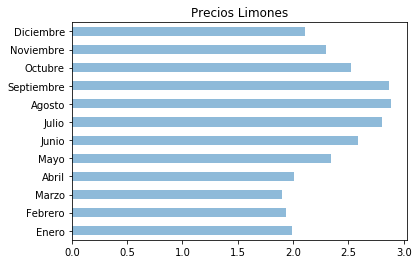

In [22]:
#Visualización precios año del producto elegido
vSeriesProducto.plot.barh(title = 'Precios ' +producto  ,stacked=True, alpha=0.5);

In [23]:
def fMenorValor(a):
    'Funcion que devuelve el mes de menor valor de la Serie Producto'

    for i, x in vSeriesProducto.items():
        if x == a:
            return(i)
        
def fMayorValor(a):
    'Funcion que devuelve el mes de mayor valor de la Serie Producto'


    for i, x in vSeriesProducto.items():
        if x == a:
            return(i)

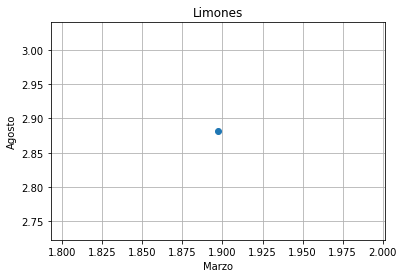

In [24]:
#VISUALIZACIÓN MEJOR Y PEOR MES PRODUCTO
vMenorIndex = vSeriesProducto.values.min()
vMayorIndex = vSeriesProducto.values.max()
vMenorValor = fMenorValor(vMenorIndex)
vMayorValor = fMayorValor(vMayorIndex)
x = vSeriesProducto[vMenorValor] 
y = vSeriesProducto[vMayorValor] 

fig, ax = plt.subplots()
lines = ax.plot(x,y , label = 'Precio')
ax.title.set_text(producto)
ax.grid(True)

ax.axes.xaxis.set_label_text(vMenorValor, fontdict={"size":10}) 
ax.axes.yaxis.set_label_text(vMayorValor, fontdict={"size":10})
ax.axis('tight');
ax.scatter(x,y);



In [25]:
#Informe de Valores del Producto
print('Mes más caro: ',vMayorValor), print('Mes más Barato: ',vMenorValor)


Mes más caro:  Agosto
Mes más Barato:  Marzo


(None, None)

In [26]:
print('Precio Máximo ', vMayorIndex), print('Precio Mínimo ', vMenorIndex)

Precio Máximo  2.881640305179628
Precio Mínimo  1.8972304074402029


(None, None)

In [30]:
print('Precio Medio ', vSeriesProducto.median()), print('Precio Mediana ', vSeriesProducto.mean())

Precio Medio  2.3204427171161512
Precio Mediana  2.35350922865


(None, None)

## Prueba Web Scraping 

In [31]:
#url de estados y número de población en millones
url = "https://es.wikipedia.org/wiki/Anexo:Provincias_de_Espa%C3%B1a_por_PIB"

req = requests.get(url)

statusCode = req.status_code
if statusCode == 200:
    print('Petición Ok')
else:
    print('Petición KO')

Petición Ok


In [32]:
htmlText = req.text
from bs4 import BeautifulSoup

if statusCode == 200:

    html = BeautifulSoup(req.text, 'html.parser')
    
    dicProvincias = {}
    # Obtención filas de la tabla 
    rows = html.find_all('tr')
    for r in rows:
        #Selección celdas de tabla (td)
        celdas=r.find_all('td')
        if len(celdas)>0 :  
            if celdas[0].string != None and celdas[0].string != 'ESPAÑA':               
                dicProvincias[celdas[1].string]= {
                'PIB': celdas[2].string}
            else:
                None
datProvinciasTemp = pd.DataFrame (dicProvincias)
datProvincias = datProvinciasTemp.T
datProvincias

,PIB
Albacete,"6,521,852"
Alicante,"34,321,944"
Almería,"13,871,424"
Asturias,"22,905,655"
Badajoz,"10,702,067"
Baleares,"26,130,320"
Barcelona,"146,368,312"
Burgos,"9,616,556"
Cantabria,"13,336,874"
Castellón,"13,855,766"
